In [1]:
# -*- coding: utf-8 -*-

"""
@implementation of --> SPAM text message <-- With Sequential Neural Network

""" 

import pandas as pd
import matplotlib.pyplot as plt

# read dataset (csv -> pandas dataframe)
# https://www.kaggle.com/team-ai/spam-text-message-classification  # link to download dataset

df = pd.read_csv("../SPAM text message 20170820 - Data.csv")
print(df.head())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


   Category                                            Message
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u oni...
2         1  Free entry in 2 a wkly comp to win FA Cup fina...
3         0  U dun say so early hor... U c already then say...
4         0  Nah I don't think he goes to usf, he lives aro...
5         1  FreeMsg Hey there darling it's been 3 week's n...
6         0  Even my brother is not like to speak with me. ...
7         0  As per your request 'Melle Melle (Oru Minnamin...
8         1  WINNER!! As a valued network customer you have...
9         1  Had your mobile 11 months or more? U R entitle...
  category  number
0     spam     747
1      ham    4825


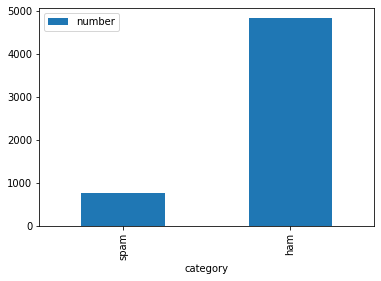

In [38]:
df["Category"].replace({'ham': 0 ,'spam': 1}, inplace=True)
print(df.head(10))

# gain insight from data
data = {'category': ['spam', 'ham'],
        'number': [len(df.loc[df.Category==1]), len(df.loc[df.Category==0])]
        }  
df_count = pd.DataFrame(data,columns=['category', 'number'])
print (df_count)

df_count.plot(x ='category', y='number', kind = 'bar')
plt.show()


In [17]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Load your dataset here
df = pd.read_csv("E:/DataSetssss/SPAM text message 20170820 - Data.csv")

# Split the dataset into X and y
X = df['Message']
y = df['Category']

# Tokenizing the input data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

# Pad the input data to a fixed length
max_len = max([len(i) for i in X])
x = pad_sequences(X, maxlen=max_len)


In [18]:
input_shape = len(tokenizer.word_index) + 1 ## expects float value in shape --> total number of unique words
input_shape 

9005

In [45]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# convert the label to numerical format to be set in model(Cast string to numeric)
y_train = y_train.replace({"spam":1, "ham":0})
y_test = y_test.replace({"spam":1, "ham":0})
# Create the sequential model
model = Sequential()
#This embedding layer initialized with random weights 
model.add(Embedding(input_dim=input_shape, output_dim=256, input_length=max_len))
#LSTM to handling sequential data(text data)
model.add(LSTM(128))
# last layer --> sigmoid --> to output a probability of the email being spam (1) or ham (0).
model.add(Dense(1, activation='sigmoid'))


In [46]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 189, 256)          2305280   
                                                                 
 lstm_4 (LSTM)               (None, 128)               197120    
                                                                 
 dense_12 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,502,529
Trainable params: 2,502,529
Non-trainable params: 0
_________________________________________________________________


In [47]:

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

# Test the model
score, acc = model.evaluate(x_test, y_test, batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

Epoch 1/10
140/140 [==============================] - 45s 293ms/step - loss: 0.1363 - accuracy: 0.9500 - val_loss: 0.0408 - val_accuracy: 0.9883
Epoch 2/10
140/140 [==============================] - 52s 369ms/step - loss: 0.0230 - accuracy: 0.9937 - val_loss: 0.0390 - val_accuracy: 0.9901
Epoch 3/10
140/140 [==============================] - 53s 376ms/step - loss: 0.0059 - accuracy: 0.9984 - val_loss: 0.0403 - val_accuracy: 0.9919
Epoch 4/10
140/140 [==============================] - 41s 295ms/step - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.0467 - val_accuracy: 0.9883
Epoch 5/10
140/140 [==============================] - 49s 347ms/step - loss: 0.0069 - accuracy: 0.9984 - val_loss: 0.0626 - val_accuracy: 0.9821
Epoch 6/10
140/140 [==============================] - 44s 316ms/step - loss: 0.0044 - accuracy: 0.9989 - val_loss: 0.0313 - val_accuracy: 0.9928
Epoch 7/10
140/140 [==============================] - 45s 316ms/step - loss: 3.2412e-04 - accuracy: 1.0000 - val_loss: 0.0367 - va

In [76]:
result_prediction = model.predict(X_test)  # indcluding the probability of being spam or ham in test set

array([[2.9692366e-05],
       [6.0694085e-05],
       [6.5867789e-05],
       ...,
       [3.1402957e-05],
       [2.0080805e-04],
       [1.5771323e-06]], dtype=float32)

In [123]:
c = [] # list of pridected value (threshold above 0.6) to campared with y_test
 
for i in range(len(b)):
    if b[i]> 0.6:
        c.append(1)
    else: c.append(0)    